In [258]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as dd
import hvplot.pandas
from distributed.utils import format_bytes, parse_bytes
from pathlib import Path
import glob


In [308]:
li=[]
li_fixed=[]
li_write=[]
f=[]
#[f for f in glob.glob("*.txt") if "abc" in f or "123" in f or "a1b" in f]
fs=[f for f in glob.glob('pange-bench/results/chey*/2020-*/compute_study_2020*.csv') if "08-0" in f or "07-" in f or "08-1" in f]


for i in fs:
    
    df_temp=dd.read_csv(i,dtype={'root':str}).compute()
    s=set(df_temp.operation)
    if ("openfile" in s) & ("writefile" not in s):
        #print("fixed",s)
        li_fixed.append(df_temp)
    elif ("writefile" in s) & ('deletefile' not in s):
        li_write.append(df_temp)
    else:
        #print(df_temp)
        li.append(df_temp)
print(len(li_fixed))
print(len(li_write))
print(len(li))


dfc=pd.concat(li)
dfc['chunk_size'] = dfc['chunk_size'].map(lambda x: format_bytes(parse_bytes(x)))
dfc['dataset_size'] = dfc['dataset_size'].map(lambda x: format_bytes(parse_bytes(x)))
dfc['dataset_size_num']=dfc.dataset_size.map(lambda x: parse_bytes(x))
dfc['throughput_Mbps'] = dfc.dataset_size_num/1e+6/dfc.runtime
dfc['chunk_size (MB)']=dfc.chunk_size.map(lambda x: parse_bytes(x))/1e+6
dfc[(dfc.io_format=='zarr' )& (dfc.filesystem=='s3')&(dfc.operation=='writefile')&(dfc.chunking_scheme=='auto')]

170
16
70


,operation,fixed_totalsize,chunk_size,chunk_per_worker,dataset_size,worker_per_node,threads_per_worker,num_nodes,chunking_scheme,io_format,filesystem,root,machine,maxmemory_per_node,maxcore_per_node,spil,runtime,dataset_size_num,throughput_Mbps,chunk_size (MB)
0,writefile,True,64.00 MB,10,12.82 GB,10,1,2,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,25.605668,12820000000,500.670397,64.0
4,writefile,True,128.00 MB,10,25.64 GB,10,1,2,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,61.712301,25640000000,415.476328,128.0
8,writefile,True,192.00 MB,10,38.46 GB,10,1,2,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,68.762375,38460000000,559.317504,192.0
12,writefile,True,256.00 MB,10,51.28 GB,10,1,2,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,107.163218,51280000000,478.522395,256.0
16,writefile,True,384.00 MB,10,76.83 GB,10,1,2,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,163.166271,76830000000,470.869375,384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,writefile,True,384.00 MB,10,115.21 GB,10,1,3,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,139.723512,115210000000,824.557001,384.0
4,writefile,True,512.00 MB,10,153.67 GB,10,1,3,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,184.513463,153670000000,832.838958,512.0
8,writefile,True,768.00 MB,10,230.42 GB,10,1,3,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,290.452418,230420000000,793.314105,768.0
0,writefile,True,512.00 MB,10,614.44 GB,10,1,12,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,240.375194,614440000000,2556.170588,512.0


In [312]:
chunk_size_list = ['64.00MB','128.00 MB', '192.00MB',  '256.00 MB', '384.00MB', '512.00MB', '786MB' ]
d1 = dfc[dfc['io_format'] == 'netcdf']
d2 = dfc[dfc['io_format'] == 'zarr']
d3 = dfc[dfc['operation'] == 'writefile']
d4 = dfc[dfc['operation'] == 'readfile']
d5 = dfc[dfc['operation'] == 'openfile']
d6 = dfc[(dfc['chunk_size'] == '256.00 MB') |(dfc['chunk_size'] == '384.00 MB')|(dfc['chunk_size'] == '768.00 MB')] 
d7 = dfc[(dfc['chunk_size'] != '1.02 GB')&(dfc['chunk_size'] != '256.00 MB')&(dfc['chunk_size'] != '512.00 MB')&(dfc['chunk_size'] != '128.00 MB')]

dd1={}

mode='writefile'
dd1['NetCDF POSIX '+mode] = d7[(d7['io_format'] == 'netcdf') & (d7['filesystem'] == 'posix') &(d7['operation'] == mode)]
#dd1['NetCDF S3 '+mode] = d7[(d7['io_format'] == 'netcdf') & (d7['filesystem'] == 's3') &(d7['operation'] == mode)]
dd1['Zarr POSIX '+mode] = d7[(d7['io_format'] == 'zarr') & (d7['filesystem'] == 'posix') &(d7['operation'] == mode)]
dd1['Zarr S3 '+mode] = d7[(d7['io_format'] == 'zarr') & (d7['filesystem'] == 's3') &(d7['operation'] == mode)]

df = pd.concat([d7])
#df = df.drop(df.index[df['operation'] == 'deletefile'])
df=df[(df['operation'] == mode)]

df[(df.io_format=='zarr')&(df.filesystem=='s3')]


,operation,fixed_totalsize,chunk_size,chunk_per_worker,dataset_size,worker_per_node,threads_per_worker,num_nodes,chunking_scheme,io_format,filesystem,root,machine,maxmemory_per_node,maxcore_per_node,spil,runtime,dataset_size_num,throughput_Mbps,chunk_size (MB)
0,writefile,True,64.00 MB,10,12.82 GB,10,1,2,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,25.605668,12820000000,500.670397,64.0
8,writefile,True,192.00 MB,10,38.46 GB,10,1,2,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,68.762375,38460000000,559.317504,192.0
16,writefile,True,384.00 MB,10,76.83 GB,10,1,2,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,163.166271,76830000000,470.869375,384.0
24,writefile,True,768.00 MB,10,153.67 GB,10,1,2,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,302.931375,153670000000,507.276607,768.0
0,writefile,True,64.00 MB,10,6.45 GB,10,1,1,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,29.699418,6450000000,217.175976,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,writefile,False,192.00 MB,10,57.65 GB,10,1,3,temporal,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,70.557812,57650000000,817.060487,192.0
16,writefile,False,384.00 MB,10,115.21 GB,10,1,3,temporal,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,153.077733,115210000000,752.624161,384.0
0,writefile,False,64.00 MB,10,38.46 GB,10,1,6,temporal,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,29.073675,38460000000,1322.846176,64.0
8,writefile,False,192.00 MB,10,115.21 GB,10,1,6,temporal,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,93.015115,115210000000,1238.615892,192.0


num_nodes  chunk_size  chunking_scheme
1          192.00 MB   auto                5458.140252
                       temporal            5397.986413
           384.00 MB   auto                4616.553158
                       temporal            5356.838522
           64.00 MB    auto                2325.753065
                       temporal            2733.097701
           768.00 MB   auto                5189.328560
                       temporal            5972.570636
2          192.00 MB   auto                9676.279230
                       temporal           10385.408913
           384.00 MB   auto               10148.758954
                       temporal            9378.380802
           64.00 MB    auto                3614.170369
                       temporal            3644.421303
           768.00 MB   auto               10962.549669
                       temporal           10562.773147
3          192.00 MB   auto               13617.263234
                       tem

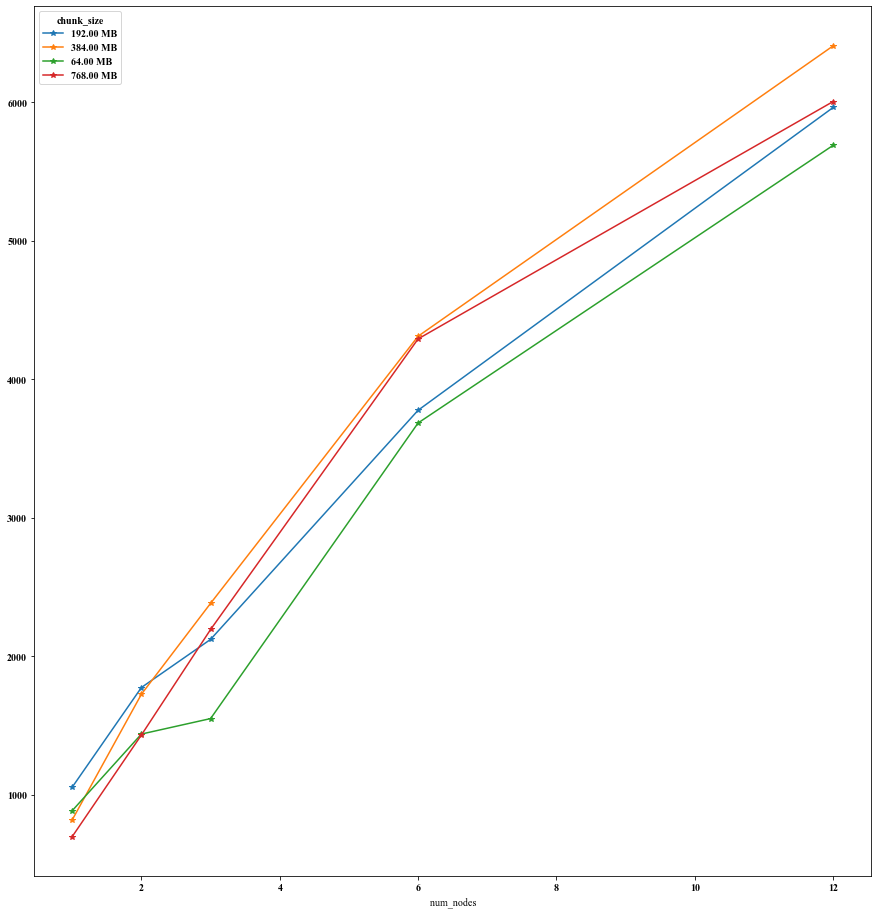

In [310]:
fig, ax = plt.subplots(figsize=(15,16))
#dd1['NetCDF S3 '+mode].groupby(['num_nodes','chunk_size']).mean()['throughput_Mbps'].unstack().plot(ax=ax,ls='--',marker='o')
dd1['Zarr S3 '+mode].groupby(['num_nodes','chunk_size']).mean()['throughput_Mbps'].unstack().plot(ax=ax,marker='*')
z=dd1['Zarr POSIX '+mode].groupby(['num_nodes','chunk_size','chunking_scheme']).mean()['throughput_Mbps']
n=dd1['NetCDF POSIX '+mode].groupby(['num_nodes','chunk_size','chunking_scheme']).mean()['throughput_Mbps']
zs=dd1['Zarr S3 '+mode].groupby(['num_nodes','chunk_size','chunking_scheme']).mean()['throughput_Mbps']
z



In [311]:
#df = get_renamed_df(dd)
#df3 = get_normalized_df(df1)
x='num_nodes'
y='runtime'
by=['chunk_size']
groupby=[ 'io_format']
dfplot = df.sort_values(x).reset_index()
    #clean_df = clean_df



dfplot = dfplot.drop(dfplot.index[dfplot.num_nodes > 16])

In [276]:
dfplot.hvplot.scatter(x=x,y=y,by=by,groupby=groupby, ylim=(0,750), xlim=(0,8), xticks=(1, 2, 3, 6))

:DynamicMap   [io_format]
   :NdOverlay   [chunk_size]
      :Scatter   [num_nodes]   (runtime)

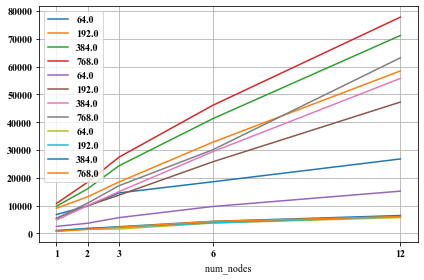

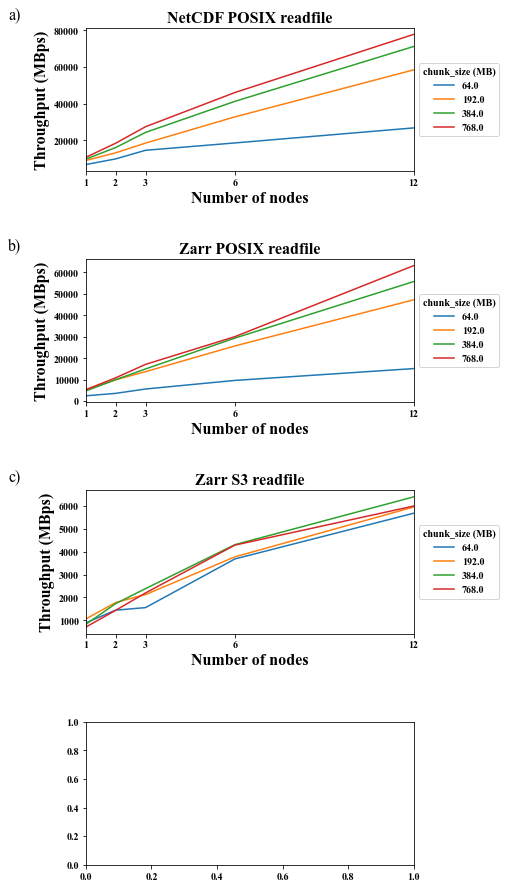

In [277]:

from matplotlib import rcParams

rcParams["font.family"] = 'Times New Roman'
rcParams['font.weight'] = 'bold'

font = {'family': 'Times New Roman',
        #'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

fig0, ax0 = plt.subplots()
fig1, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 13))
colormap = ['r', 'b', 'green', 'yellow', 'cyan', 'orange','gray', 'purple']

total_nbytes=460.85*1000
label_list=('a)', 'b)', 'c)', 'd)')
for (name, dd_one), color, ax1, label in zip(dd1.items(), colormap, axs.flat, label_list):
    for ax in [ax0, ax1]:
        temp=dd_one.groupby(['num_nodes','chunk_size (MB)']).mean()
        temp1=dd_one.groupby(['num_nodes','chunk_size (MB)']).agg(['std'])
        #temp2=temp['dataset_size_num']/1e+6/temp['runtime']
        
        temp2=temp['throughput_Mbps']
        
        temp2.unstack().plot(kind='line',
                   ls="-",  ax=ax,xticks=(1,2,3,6,12))
        
      
       

    #ax1.grid()
    ax1.set_ylabel('Runtime (seconds)',fontdict=font)
    ax1.set_ylabel('Throughput (MBps)',fontdict=font)
    ax1.set_xlabel('Number of nodes', fontdict=font)
    ax1.set_title(name, fontdict=font)
    ax1.legend(loc='center left',title='chunk_size (MB)',bbox_to_anchor=(1, 0.5))
    ax1.set_xlim(1, 12)
    
    ax1.text(-0.2, 1.15, label, transform=ax1.transAxes,
         fontsize=16, fontweight='regular', va='top', ha='right')

ax0.grid()
ax0.legend(loc='upper left')

fig0.tight_layout()
fig1.tight_layout(pad=3.0)
plt.savefig('temp.png')

In [278]:
dfplot.hvplot.box(y, by=x,groupby=['operation', 'chunking_scheme','chunk_size','io_format', 'filesystem'])

:DynamicMap   [operation,chunking_scheme,chunk_size,io_format,filesystem]
   :BoxWhisker   [num_nodes]   (runtime)

In [313]:
def get_clean_df(df):
    weakmode=True
    if weakmode:
        groupby=[ 'operation','chunk_size (MB)', 'num_nodes','io_format','filesystem','chunk_size','dataset_size_num']

    else:
        groupby=[ 'operation','chunk_size (MB)', 'num_nodes','io_format','filesystem','chunk_size']
    clean_df = df.groupby(groupby).runtime.agg([ 'mean', 'median', 'std','count']).reset_index()
    clean_df['mean+std']=clean_df['mean'] + clean_df['std']
    clean_df['mean-std']=clean_df['mean'] - clean_df['std']
    if weakmode:
        clean_df['thruput+mean']=clean_df['dataset_size_num']/1e+6/clean_df['median']
        clean_df['thruput+mean+std']=clean_df['dataset_size_num']/1e+6/clean_df['mean-std']
        clean_df['thruput+mean-std']=clean_df['dataset_size_num']/1e+6/clean_df['mean+std']
        clean_df['thruput+std']=clean_df['thruput+mean']-clean_df['thruput+mean-std']
    else:
        clean_df['thruput+mean']=460.85*1000/clean_df['median']
        clean_df['thruput+mean+std']=460.85*1000/clean_df['mean-std']
        clean_df['thruput+mean-std']=460.85*1000/clean_df['mean+std']
    clean_df.sort_values(by=[ 'num_nodes','chunk_size (MB)']).reset_index()
    #clean_df = clean_df.drop(columns=[ 'mean', 'std'])

    return clean_df
#analyseddf = get_clean_df(df.loc[(df['operation']=='writefile')&(df.io_format=='zarr')&(df.filesystem=='s3')])
analyseddf=get_clean_df(df)
print('each tests were done ', analyseddf['count'].min() ,' to ', analyseddf['count'].max() ,'times')
print('in total we have done',  len(df)  , 'computations')
print('run time of each computasion varied from', analyseddf['thruput+mean'].min(),' to', analyseddf['thruput+mean'].max() ,'seconds' )

z=analyseddf[(analyseddf.io_format=='zarr')&(analyseddf.filesystem=='posix')]['mean'].reset_index()
n=analyseddf[(analyseddf.io_format=='netcdf')&(analyseddf.filesystem=='posix')]['mean'].reset_index()
n,z,n.subtract(z).div(n)
#n.count()
#analyseddf[(analyseddf.io_format=='zarr')&(analyseddf.filesystem=='s3')]
df[(df.io_format=='netcdf')&(df.filesystem=='posix')&(df.chunk_size=='64.00 MB')&(df.num_nodes==2)]
           

each tests were done  1  to  6 times
in total we have done 251 computations
run time of each computasion varied from 37.38153283884738  to 16090.706116090518 seconds


,operation,fixed_totalsize,chunk_size,chunk_per_worker,dataset_size,worker_per_node,threads_per_worker,num_nodes,chunking_scheme,io_format,filesystem,root,machine,maxmemory_per_node,maxcore_per_node,spil,runtime,dataset_size_num,throughput_Mbps,chunk_size (MB)
0,writefile,True,64.00 MB,10,12.82 GB,10,1,2,temporal,netcdf,posix,NaN,cheyenne,109gb,36,False,21.288498,12820000000,602.203126,64.0
0,writefile,True,64.00 MB,10,12.82 GB,10,1,2,temporal,netcdf,posix,NaN,cheyenne,109gb,36,False,20.923824,12820000000,612.698709,64.0
0,writefile,True,64.00 MB,10,12.82 GB,10,1,2,temporal,netcdf,posix,NaN,cheyenne,109gb,36,False,20.859982,12820000000,614.573876,64.0
4,writefile,False,64.00 MB,10,12.82 GB,10,1,2,temporal,netcdf,posix,NaN,cheyenne,109gb,36,False,17.866784,12820000000,717.532617,64.0
4,writefile,False,64.00 MB,10,12.82 GB,10,1,2,temporal,netcdf,posix,NaN,cheyenne,109gb,36,False,18.457160,12820000000,694.581389,64.0


In [314]:
def get_normalized_df(df,key='median'):
    #normalize runtime
    dfnew = pd.DataFrame() 
    #chunking_scheme_list = set(df['chunking_scheme'])
    operation_list = set(df['operation'])
    chunk_size_list = set(df['chunk_size'])
    for operation in operation_list: 
        df1 = df.query('operation == "{operation}"'.format(operation = operation)).copy() 
        for chunk_size in chunk_size_list: 
                df2 = df1.query('chunk_size == "{chunk_size}"'.format(chunk_size = chunk_size)).copy() 
            #for chunking_scheme in chunking_scheme_list: 
                #seg = df2.query('chunking_scheme == "{chunking_scheme}"'.format(chunking_scheme = chunking_scheme)).copy()
                seg = df2.copy()
                seg['normalized'] = seg[key]
                #seg.normalized= seg.normalized/seg[seg.num_nodes == 1 ].normalized.min()
                tt= seg[seg.num_nodes == 1 ]
                norm=tt['median'].min()
                seg.normalized= seg.normalized/norm
                dfnew = pd.concat([dfnew,seg])
    return dfnew


In [315]:
df1 = get_normalized_df(analyseddf,key='median')
df1['normalized_median'] = df1.normalized
df1=df1.drop(columns=['normalized'])

In [316]:
df2 = get_normalized_df(df1,key='mean+std')
df2['normalized_mean+std'] = df2.normalized
df2=df2.drop(columns=['normalized'])
df3 = get_normalized_df(df2,key='mean-std')
df3['normalized_mean-std'] = df3.normalized
df3=df3.drop(columns=['normalized'])
df3
#df3[['num_nodes','io_format','filesystem','chunk_size','thruput+mean','count','thruput+mean+std','mean','std']

,operation,chunk_size (MB),num_nodes,io_format,filesystem,chunk_size,dataset_size_num,mean,median,std,count,mean+std,mean-std,thruput+mean,thruput+mean+std,thruput+mean-std,thruput+std,normalized_median,normalized_mean+std,normalized_mean-std
0,writefile,64.0,1,netcdf,posix,64.00 MB,6450000000,16.279275,15.972067,2.207251,5,18.486526,14.072023,403.830015,458.356263,348.902760,54.927254,1.739170,2.012965,1.532278
1,writefile,64.0,1,netcdf,s3,64.00 MB,6450000000,172.545091,172.545091,NaN,1,NaN,NaN,37.381533,NaN,NaN,NaN,18.788131,NaN,NaN
2,writefile,64.0,1,zarr,posix,64.00 MB,6450000000,8.753706,9.183728,0.990095,5,9.743801,7.763611,702.329128,830.799003,661.959312,40.369816,1.000000,1.060985,0.845366
3,writefile,64.0,1,zarr,s3,64.00 MB,6450000000,32.145561,29.921361,4.836774,4,36.982335,27.308786,215.565063,236.187720,174.407593,41.157470,3.258084,4.026941,2.973606
4,writefile,64.0,2,netcdf,posix,64.00 MB,12820000000,19.879250,20.859982,1.589914,5,21.469164,18.289335,614.573876,700.954946,597.135504,17.438372,2.271407,2.337739,1.991493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,writefile,192.0,6,zarr,posix,192.00 MB,115210000000,18.146720,18.424870,1.248110,5,19.394830,16.898610,6252.961508,6817.720641,5940.242781,312.718727,1.135666,1.195453,1.041591
28,writefile,192.0,6,zarr,s3,192.00 MB,115210000000,91.701237,89.705781,8.086942,4,99.788178,83.614295,1284.309650,1377.874442,1154.545578,129.764071,5.529257,6.150713,5.153792
29,writefile,192.0,12,netcdf,posix,192.00 MB,230420000000,190.850023,190.850023,1.746112,2,192.596135,189.103911,1207.335459,1218.483523,1196.389535,10.945924,11.763555,11.871181,11.655929
30,writefile,192.0,12,zarr,posix,192.00 MB,230420000000,17.940280,17.274999,1.449212,4,19.389492,16.491068,13338.351248,13972.412097,11883.756115,1454.595133,1.064791,1.195124,1.016471


In [330]:
def log_linear_plot(df, title_df,loglog=False, plot_kind='line', x='num_nodes', y='normalized_median', ylabel='Normalized runtime ', 
                    y1='thruput+std',
                    y2='thruput+mean+std',
                    by=['chunk_size'], subplots=True, groupby=[ 'io_format','filesystem'], 
                    ylim=(10, 18000),xlim=(0.8,12.2),xticks=(1, 2, 3, 6, 12), shared_axes=True,
                    figname='test',png=False,col=1):
    if loglog:
        title = f'{title_df} -- Log scale'
    else:
        title = f'{title_df}'
    legend = 'right'
    
    ylabel='Throughput (MBps)'
    xlabel='Number of nodes'
    

    def hook(plot, element):
        plot.handles['xaxis'].axis_label_text_font_style = 'bold'
        plot.handles['yaxis'].axis_label_text_font_style = 'bold'
        plot.handles['xaxis'].axis_label_text_font = 'times new roman' 
        plot.handles['yaxis'].axis_label_text_font = 'times new roman' 
        plot.handles['plot'].legend.label_text_font = "times new roman"
        plot.handles['plot'].title.text_font = "times new roman"
        plot.handles['plot'].plot_width = 500
        plot.handles['plot'].plot_height = 225



        
    if subplots:
        line = df.hvplot(x=x, y=y, by=by,
        groupby=groupby,
        height=400,width=500,
        loglog=loglog, 
        kind=plot_kind, title=title, xlabel=xlabel,ylabel=ylabel,
        dynamic=False, 
                         legend=legend, 
                         use_index=False,shared_axes=shared_axes,
        yaxis='left',
        #xticks=xticks,
        fontsize={'xticks':12,'yticks':12,'ylabel':12, 'xlabel':12,'title':14,'legend':12 },

        xticks=[(1,1),(2, 2),(3, 3),(4, ' '), (5, ' '), (6, 6), (7, ' '),(8, ' '),(9, ' '), (10, ' '), (11, ' '), (12,12), (13, ' '), (14, ' '), (15, ' '),(16,16)],
       # yticks=(1.0,1.2,1.4,1.6,1.8,2.0),
        ylim=ylim,xlim=xlim).layout().cols(col)
        scatter = df.hvplot.scatter(x=x, y=y, by=by,
        groupby=groupby,
        height=400,width=500,
        loglog=loglog, 
        title=title, xlabel=xlabel,ylabel=ylabel,
        dynamic=False, 
                         legend=legend, 
                         use_index=False,shared_axes=shared_axes,
        yaxis='left',
        #xticks=xticks,
        fontsize={'xticks':12,'yticks':12,'ylabel':12, 'xlabel':12,'title':14,'legend':12 },

        xticks=[(1,1),(2, 2),(3, 3),(4, ' '), (5, ' '), (6, 6), (7, ' '),(8, ' '),(9, ' '), (10, ' '), (11, ' '), (12,12), (13, ' '), (14, ' '), (15, ' '),(16,16)],
       # yticks=(1.0,1.2,1.4,1.6,1.8,2.0),
        ylim=ylim,xlim=xlim).layout().cols(col)
        area = df.hvplot.errorbars(x=x,y=y,yerr1=y1, by=by, alpha=0.2, 
                              groupby=groupby, loglog=loglog, 
                                      height=300,width=500,
                              stacked=False).opts(hooks=[hook]).layout().cols(1)


    else:
        line = df.hvplot(x=x, y=y, by=by,
                  groupby=groupby,height=300,width=500,
                  rot=45, loglog=loglog, 
                  kind=plot_kind, title=title, ylabel=ylabel,
                  dynamic=False, legend=legend,
                  use_index=False,shared_axes=shared_axes,
                  ylim=ylim)
    fig= line *scatter*area
    #* area
    if png: 
       
       hvplot.save(fig, figname)
    return fig

In [328]:
mode='writefile'
log_linear_plot(analyseddf[(analyseddf.operation == mode)&(analyseddf.io_format == 'netcdf')&(analyseddf.filesystem == 'posix')] ,'NetCDF POSIX write',loglog=False, col=1,y='thruput+mean',groupby=['io_format','filesystem'],figname='cheyenneweaknetcdfposix_3'+mode+'.png',
               png=True)


:NdLayout   [io_format,filesystem]
   :Overlay
      .NdOverlay.I   :NdOverlay   [chunk_size]
         :Curve   [num_nodes]   (thruput+mean)
      .NdOverlay.II  :NdOverlay   [chunk_size]
         :Scatter   [num_nodes]   (thruput+mean)
      .NdOverlay.III :NdOverlay   [chunk_size]
         :ErrorBars   [num_nodes]   (thruput+mean,thruput+std)

In [331]:

log_linear_plot(analyseddf[(analyseddf.operation == mode)&(analyseddf.io_format == 'zarr')&(analyseddf.filesystem == 'posix')] ,'Zarr POSIX write',loglog=False, col=1,y='thruput+mean',groupby=['io_format','filesystem'],figname='cheyenneweakzarrposix_3'+mode+'.png',
                png=True)


:NdLayout   [io_format,filesystem]
   :Overlay
      .NdOverlay.I   :NdOverlay   [chunk_size]
         :Curve   [num_nodes]   (thruput+mean)
      .NdOverlay.II  :NdOverlay   [chunk_size]
         :Scatter   [num_nodes]   (thruput+mean)
      .NdOverlay.III :NdOverlay   [chunk_size]
         :ErrorBars   [num_nodes]   (thruput+mean,thruput+std)

In [329]:
#c=analyseddf[(analyseddf.operation == 'writefile')&(analyseddf.io_format == 'zarr')]['chunk_size']
log_linear_plot(analyseddf[(analyseddf.operation == mode)&(analyseddf.io_format == 'zarr')&(analyseddf.filesystem == 's3')] ,'Zarr S3 write',loglog=False, col=1,y='thruput+mean',groupby=['io_format','filesystem'],figname='cheyenneweakzarrs3_3'+mode+'.png',
                png=True)


:NdLayout   [io_format,filesystem]
   :Overlay
      .NdOverlay.I   :NdOverlay   [chunk_size]
         :Curve   [num_nodes]   (thruput+mean)
      .NdOverlay.II  :NdOverlay   [chunk_size]
         :Scatter   [num_nodes]   (thruput+mean)
      .NdOverlay.III :NdOverlay   [chunk_size]
         :ErrorBars   [num_nodes]   (thruput+mean,thruput+std)